<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/DogePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
doge=pd.read_csv("DOGE-USD.csv")
print(doge)
doge.info()

            Date      Open      High       Low     Close        Volume
0     2014-09-17  0.000293  0.000299  0.000260  0.000268  1.463600e+06
1     2014-09-18  0.000268  0.000325  0.000267  0.000298  2.215910e+06
2     2014-09-19  0.000298  0.000307  0.000275  0.000277  8.835630e+05
3     2014-09-20  0.000276  0.000310  0.000267  0.000292  9.930040e+05
4     2014-09-21  0.000293  0.000299  0.000284  0.000288  5.391400e+05
...          ...       ...       ...       ...       ...           ...
2591  2021-10-21  0.254793  0.258261  0.242273  0.242391  1.742571e+09
2592  2021-10-22  0.242479  0.252772  0.236472  0.244221  1.829875e+09
2593  2021-10-23  0.244514  0.253140  0.241589  0.251733  1.502685e+09
2594  2021-10-24  0.251432  0.281935  0.246028  0.277048  5.278761e+09
2595  2021-10-25  0.274789  0.278905  0.261085  0.264336  4.801954e+09

[2596 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column  Non-

Data Preparation

In [4]:
doge[doge.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume
2039,2020-04-17,NaN,NaN,NaN,NaN,NaN
2214,2020-10-09,NaN,NaN,NaN,NaN,NaN
2217,2020-10-12,NaN,NaN,NaN,NaN,NaN
2218,2020-10-13,NaN,NaN,NaN,NaN,NaN


In [5]:
doge = doge.dropna()
doge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2592 non-null   object 
 1   Open    2592 non-null   float64
 2   High    2592 non-null   float64
 3   Low     2592 non-null   float64
 4   Close   2592 non-null   float64
 5   Volume  2592 non-null   float64
dtypes: float64(5), object(1)
memory usage: 141.8+ KB


Analisis Univariat

In [6]:
# We'll take only one variable into consideration to Predict the Price of the DOGECOIN
close = doge.Close.iloc[:].to_numpy()
close

array([2.68000e-04, 2.98000e-04, 2.77000e-04, ..., 2.51733e-01,
       2.77048e-01, 2.64336e-01])

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
closeScaled = scaler.fit_transform(np.array(close).reshape(-1,1))
closeScaled

array([[2.64353211e-04],
       [3.08168660e-04],
       [2.77497846e-04],
       ...,
       [3.67532752e-01],
       [4.04505689e-01],
       [3.85939622e-01]])

In [8]:
closeLength = len(closeScaled)
train, test = closeScaled[:(closeLength-150)], closeScaled[(closeLength-150):]
len(train), len(test)

(2442, 150)

In [9]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
inputs = 15
features = 1 ## Univariate means only 1 independent variable
generator = TimeseriesGenerator(train, train, length=inputs, batch_size=1)

In [10]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(inputs, features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(generator, epochs=100)

Epoch 1/100
2427/2427 [==============================] - 122s 50ms/step - loss: 0.0026
Epoch 2/100
2427/2427 [==============================] - 123s 51ms/step - loss: 9.3399e-04
Epoch 3/100
2427/2427 [==============================] - 123s 50ms/step - loss: 4.7669e-04
Epoch 4/100
2427/2427 [==============================] - 122s 50ms/step - loss: 3.7174e-04
Epoch 5/100
2427/2427 [==============================] - 125s 51ms/step - loss: 3.1378e-04
Epoch 6/100
2427/2427 [==============================] - 123s 51ms/step - loss: 3.4893e-04
Epoch 7/100
2427/2427 [==============================] - 123s 51ms/step - loss: 3.1336e-04
Epoch 8/100
2427/2427 [==============================] - 122s 50ms/step - loss: 2.3036e-04
Epoch 9/100
2427/2427 [==============================] - 122s 50ms/step - loss: 2.7308e-04
Epoch 10/100
2427/2427 [==============================] - 121s 50ms/step - loss: 2.4313e-04
Epoch 11/100
2427/2427 [==============================] - 120s 50ms/step - loss: 2.5096e-04
E

In [14]:
test_predictions = []

first_eval_batch = train[-inputs:]
current_batch = first_eval_batch.reshape((1, inputs, features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [15]:
test_predictions

[array([0.4533481], dtype=float32),
 array([0.4458161], dtype=float32),
 array([0.4568001], dtype=float32),
 array([0.4722523], dtype=float32),
 array([0.50919974], dtype=float32),
 array([0.5550151], dtype=float32),
 array([0.6122252], dtype=float32),
 array([0.64741856], dtype=float32),
 array([0.6772803], dtype=float32),
 array([0.7093808], dtype=float32),
 array([0.7341762], dtype=float32),
 array([0.7521822], dtype=float32),
 array([0.7596961], dtype=float32),
 array([0.77587336], dtype=float32),
 array([0.79188436], dtype=float32),
 array([0.7930261], dtype=float32),
 array([0.7854655], dtype=float32),
 array([0.76915616], dtype=float32),
 array([0.75971913], dtype=float32),
 array([0.75129473], dtype=float32),
 array([0.74281573], dtype=float32),
 array([0.7279133], dtype=float32),
 array([0.72406024], dtype=float32),
 array([0.72131675], dtype=float32),
 array([0.7101267], dtype=float32),
 array([0.69195116], dtype=float32),
 array([0.67848724], dtype=float32),
 array([0.671006

In [16]:
true_predictions = scaler.inverse_transform(test_predictions)

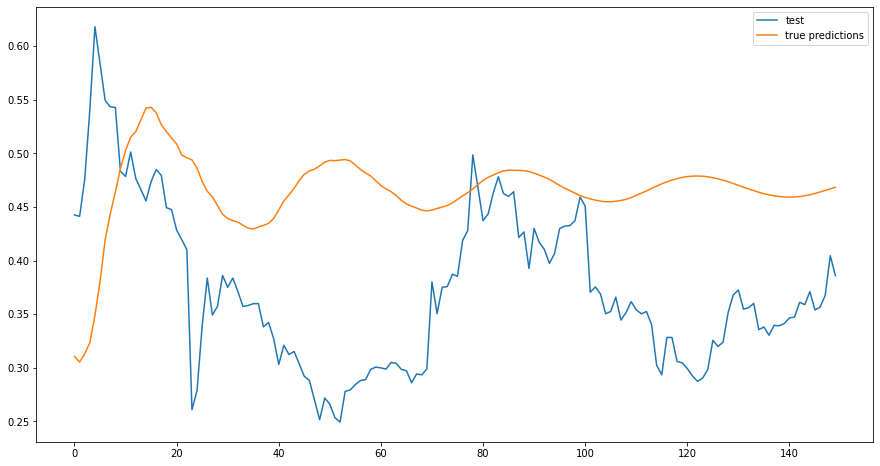

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(test, label='original')
plt.plot(true_predictions, label='predicted')
plt.legend(['test','true predictions'])
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,true_predictions))
print(rmse)

0.12749839127499255


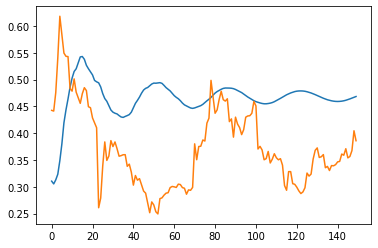

In [19]:
plt.plot(true_predictions)
plt.plot(test)